# 普通統計數據可視化圖表 for ALL questions’ results, including 受訪者人口調查part.

## Q1. 你多大程度同意「回收 對環保及可持續發展很重要」？ To what extent do you agree that "recycling is important for environmental protection and sustainable development?"

In [33]:
pip install pandas matplotlib openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


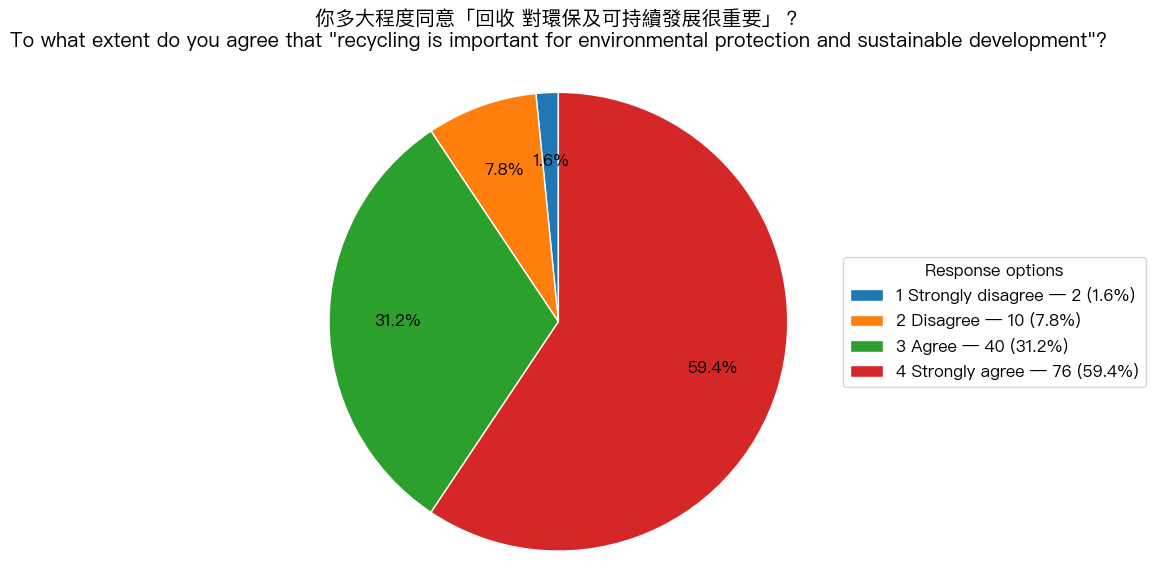

In [41]:
# ------------------------------------------------------------
# Pie chart of responses to:
# 「你多大程度同意『回收 對環保及可持續發展很重要』？」
# "To what extent do you agree that recycling is important for
#  environmental protection and sustainable development?"
#
# How to run:
#   Place this in a script or in 1.1.ipynb.
#   Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   Run it; only the pie chart will display (white background).
# ------------------------------------------------------------

# --- install deps if missing (works in VS Code / Python scripts) ---
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# --- imports ---
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

# --- config paths (relative to this notebook/script location) ---
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# --- load data ---
df = pd.read_excel(data_path, engine="openpyxl")

# --- find the column for this question ---
key_patterns = [
    r"recycling\s+is\s+important\s+for\s+environmental\s+protection\s+and\s+sustainable\s+development",
    r"你多大程度同意.*回收.*環保.*可持續發展.*重要",
]

def _find_question_column(columns):
    joined = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in joined:
        if re.search(key_patterns[0], norm, flags=re.IGNORECASE):
            return c
    for c, norm in joined:
        if re.search(key_patterns[1], norm):
            return c
    for c, norm in joined:
        if re.search(r"recycling", norm, flags=re.IGNORECASE) and re.search(r"sustain", norm, flags=re.IGNORECASE):
            return c
    return None

col = _find_question_column(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column automatically. Please set `col` to the exact header.")

# --- clean & map responses ---
series = df[col].dropna()

text_to_num = {
    "strongly disagree": 1, "非常不同意": 1, "1": 1, 1: 1,
    "disagree": 2, "不同意": 2, "2": 2, 2: 2,
    "agree": 3, "同意": 3, "3": 3, 3: 3,
    "strongly agree": 4, "非常同意": 4, "4": 4, 4: 4,
}
def to_num(v):
    s = str(v).strip().lower()
    return text_to_num.get(v, text_to_num.get(s))

nums = series.map(to_num).dropna().astype(int)

label_map = {
    1: "1 Strongly disagree",
    2: "2 Disagree",
    3: "3 Agree",
    4: "4 Strongly agree",
}

counts = nums.value_counts().reindex([1, 2, 3, 4], fill_value=0)
labels = [label_map[i] for i in [1, 2, 3, 4]]

# --- font (Chinese capable if available) ---
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# --- plotting (white background, clear, no overlaps) ---
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

total = counts.sum()
pct = (counts / total * 100).round(1) if total > 0 else counts.astype(float)

# NOTE: pie() returns THREE values when autopct is used.
wedges, texts, autotexts = ax.pie(
    counts.values,
    startangle=90,
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor="white"),
)

# Build legend on the right with counts and percentages
legend_labels = [
    f"{labels[i]} — {int(counts.values[i])}" + (f" ({pct.values[i]}%)" if total > 0 else "")
    for i in range(len(labels))
]
ax.legend(
    wedges, legend_labels,
    title="Response options",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "你多大程度同意「回收 對環保及可持續發展很重要」？"
title_en = 'To what extent do you agree that "recycling is important for environmental protection and sustainable development"?'
ax.set_title(title_cn + "\n" + title_en, pad=16)

ax.axis("equal")
plt.tight_layout()
plt.show()


## Q2. 你認爲自己對本地回收的了解程度屬於哪一水平？ How would you rate your level of knowledge about recycling?

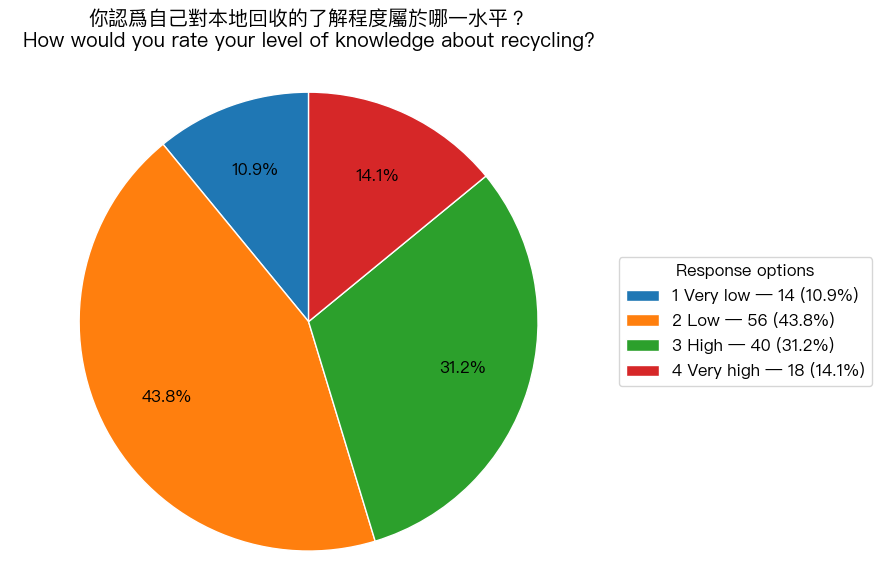

In [42]:
# ------------------------------------------------------------
# Pie chart of responses to:
# 「你認爲自己對本地回收的了解程度屬於哪一水平？」
# "How would you rate your level of knowledge about recycling?"
#
# How to run:
#   Put this in a cell of 1.1.ipynb (or any .py script).
#   Ensure the Excel file exists at: ../GCAP3226 G@C Survey Responses_cleaned data.xlsx
#   Run it; only the pie chart will display (white background).
# ------------------------------------------------------------

# --- install deps if missing (works in VS Code / Python scripts) ---
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# --- imports ---
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib

# --- config paths (relative to this notebook/script location) ---
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# --- load data ---
df = pd.read_excel(data_path, engine="openpyxl")

# --- find the column for this question (Chinese or English header) ---
key_patterns = [
    r"how\s+would\s+you\s+rate\s+your\s+level\s+of\s+knowledge\s+about\s+recycling",
    r"你認爲?自己對本地回收的了解程度屬於哪一水平",
    r"對本地回收.*了解程度",
]

def _find_question_column(columns):
    joined = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in joined:
        if re.search(key_patterns[0], norm, flags=re.IGNORECASE):
            return c
    for c, norm in joined:
        if any(re.search(p, norm) for p in key_patterns[1:]):
            return c
    # fallback: any column containing "knowledge" and "recycling"
    for c, norm in joined:
        if re.search(r"knowledge", norm, flags=re.IGNORECASE) and re.search(r"recycling", norm, flags=re.IGNORECASE):
            return c
    return None

col = _find_question_column(df.columns)
if col is None:
    raise RuntimeError("Could not find the survey column automatically. Please set `col` to the exact header.")

# --- clean & map responses ---
series = df[col].dropna()

# Accept numeric 1-4 or common text equivalents in EN/ZH
text_to_num = {
    # 1 Very low
    "very low": 1, "1": 1, 1: 1, "非常低": 1, "很低": 1, "極低": 1, "低（很低）": 1,
    # 2 Low
    "low": 2, "2": 2, 2: 2, "低": 2, "較低": 2,
    # 3 High
    "high": 3, "3": 3, 3: 3, "高": 3, "較高": 3,
    # 4 Very high
    "very high": 4, "4": 4, 4: 4, "非常高": 4, "很高": 4, "極高": 4, "高（很高）": 4,
}
def to_num(v):
    s = str(v).strip().lower()
    return text_to_num.get(v, text_to_num.get(s))

nums = series.map(to_num).dropna().astype(int)

# Final label mapping (complete the missing content, e.g., 3 -> "3 High")
label_map = {
    1: "1 Very low",
    2: "2 Low",
    3: "3 High",
    4: "4 Very high",
}

counts = nums.value_counts().reindex([1, 2, 3, 4], fill_value=0)
labels = [label_map[i] for i in [1, 2, 3, 4]]

# --- font (Chinese-capable if available) ---
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK", "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# --- plotting (white background, clear, no overlaps) ---
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

total = counts.sum()
pct = (counts / total * 100).round(1) if total > 0 else counts.astype(float)

# pie() returns THREE values when autopct is used.
wedges, texts, autotexts = ax.pie(
    counts.values,
    startangle=90,
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor="white"),
)

# Legend on the right with counts + percentages for readability
legend_labels = [
    f"{labels[i]} — {int(counts.values[i])}" + (f" ({pct.values[i]}%)" if total > 0 else "")
    for i in range(len(labels))
]
ax.legend(
    wedges, legend_labels,
    title="Response options",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "你認爲自己對本地回收的了解程度屬於哪一水平？"
title_en = "How would you rate your level of knowledge about recycling?"
ax.set_title(title_cn + "\n" + title_en, pad=16)

ax.axis("equal")  # keep circle shape
plt.tight_layout()
plt.show()
